In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset= pd.read_csv(".\dataset\Placement_Data_Full_Class.csv")

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
dataset_copy=dataset.copy()
dataset_copy['degree_t']=encode.fit_transform(dataset_copy['degree_t'].astype('str'))
dataset_copy

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,2,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,0,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,2,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,0,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,0,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,2,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,0,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,0,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
dataset_copy['specialisation']=dataset_copy['specialisation'].astype('category').cat.codes
dataset_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,2,No,55.0,1,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,2,Yes,86.5,0,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,0,No,75.0,0,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,2,No,66.0,1,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,0,No,96.8,0,55.50,Placed,425000.0


In [7]:
print(dataset.groupby('degree_t').size())
print(dataset.head())
print(dataset_copy.groupby('degree_t').size())
print(dataset_copy.head())

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
dtype: int64
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
degree_t
0    145
1     11
2     59
dtype: int64
 

In [42]:
print(dataset.groupby('specialisation').size())
print("\n\nThe type of specialisations in the dataset are : ", dataset['specialisation'].unique(),"\n\n")
print(dataset.head())
print(dataset_copy.groupby('specialisation').size())
print(dataset_copy.head())

specialisation
Mkt&Fin    120
Mkt&HR      95
dtype: int64


The type of specialisations in the dataset are :  ['Mkt&HR' 'Mkt&Fin'] 


   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  

In [9]:
dataset_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,2,No,55.0,1,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,2,Yes,86.5,0,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,0,No,75.0,0,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,2,No,66.0,1,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,0,No,96.8,0,55.50,Placed,425000.0


In [10]:
dataset_copy['gender']=dataset_copy['gender'].astype('category').cat.codes
dataset_copy['status']=dataset_copy['status'].astype('category').cat.codes
dataset_copy['workex']=dataset_copy['workex'].astype('category').cat.codes
dataset_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,0,0,96.8,0,55.50,1,425000.0


In [11]:
print(dataset.groupby('gender').size())
print(dataset.groupby('status').size())
dataset.head()
print(dataset_copy.groupby('gender').size())
print(dataset_copy.groupby('status').size())
dataset_copy.head()

gender
F     76
M    139
dtype: int64
status
Not Placed     67
Placed        148
dtype: int64
gender
0     76
1    139
dtype: int64
status
0     67
1    148
dtype: int64


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,0,0,96.8,0,55.50,1,425000.0


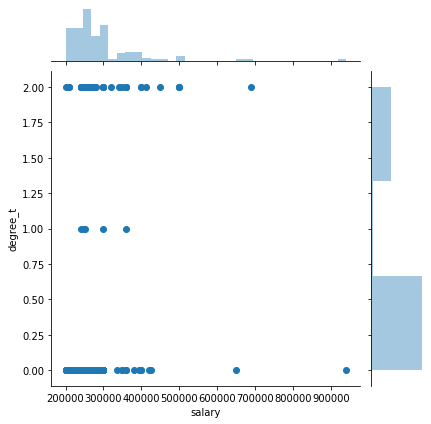

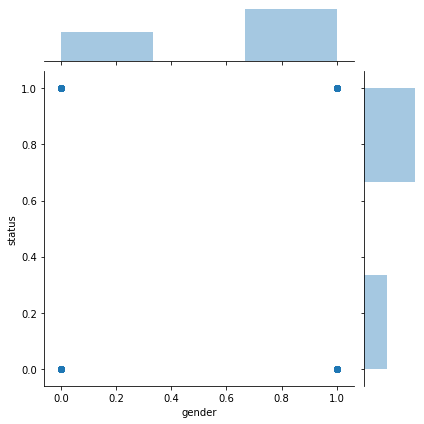

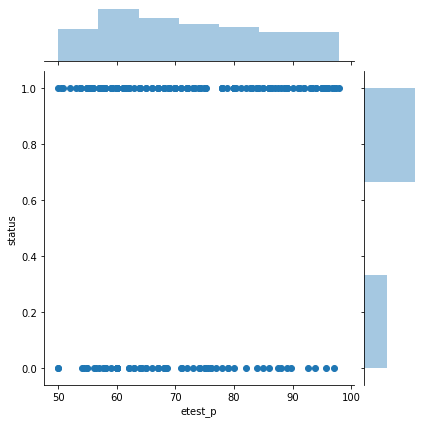

In [38]:

sb.jointplot(data=dataset_copy,y='degree_t',x='salary')

sb.jointplot(data=dataset_copy,x='gender',y='status')

sb.jointplot(data=dataset_copy,x='etest_p',y='status')


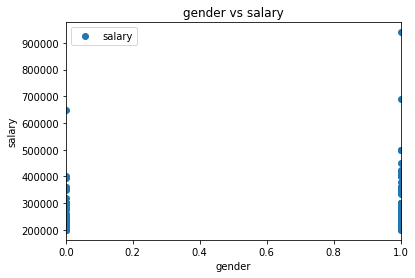

In [13]:
dataset_copy.plot(x="gender", y="salary", style="o")
plt.title("gender vs salary")
plt.xlabel("gender")
plt.ylabel("salary")
plt.show()

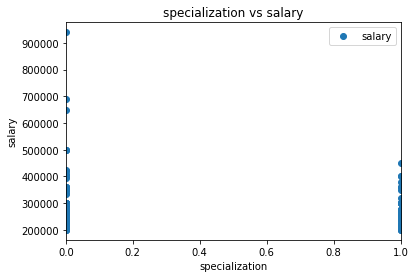

In [14]:
dataset_copy.plot(x="specialisation", y="salary", style="o")
plt.title("specialization vs salary")
plt.xlabel("specialization")
plt.ylabel("salary")
plt.show()

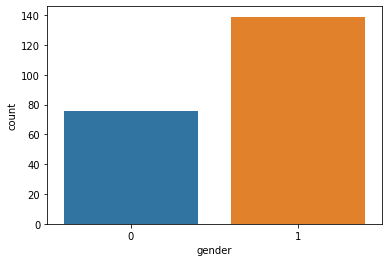

In [15]:
sb.countplot(dataset_copy['gender'])


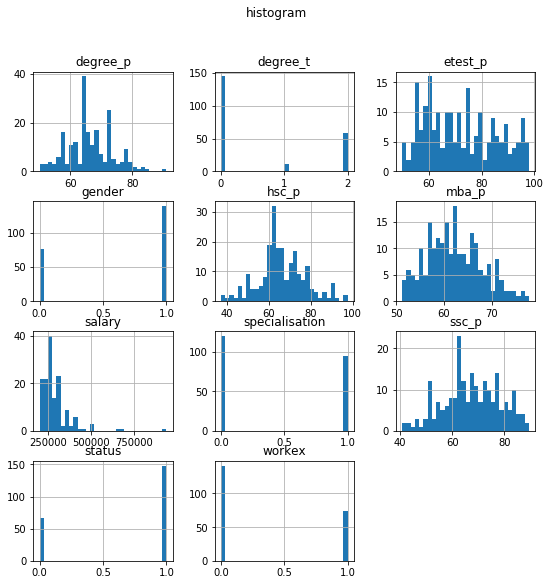

In [51]:
import pylab as pl
dataset_copy.drop('sl_no',axis=1).hist(bins=30,figsize=(9,9))
pl.suptitle('histogram')
plt.savefig('placements')
plt.show()

C:\Users\shubh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shubh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


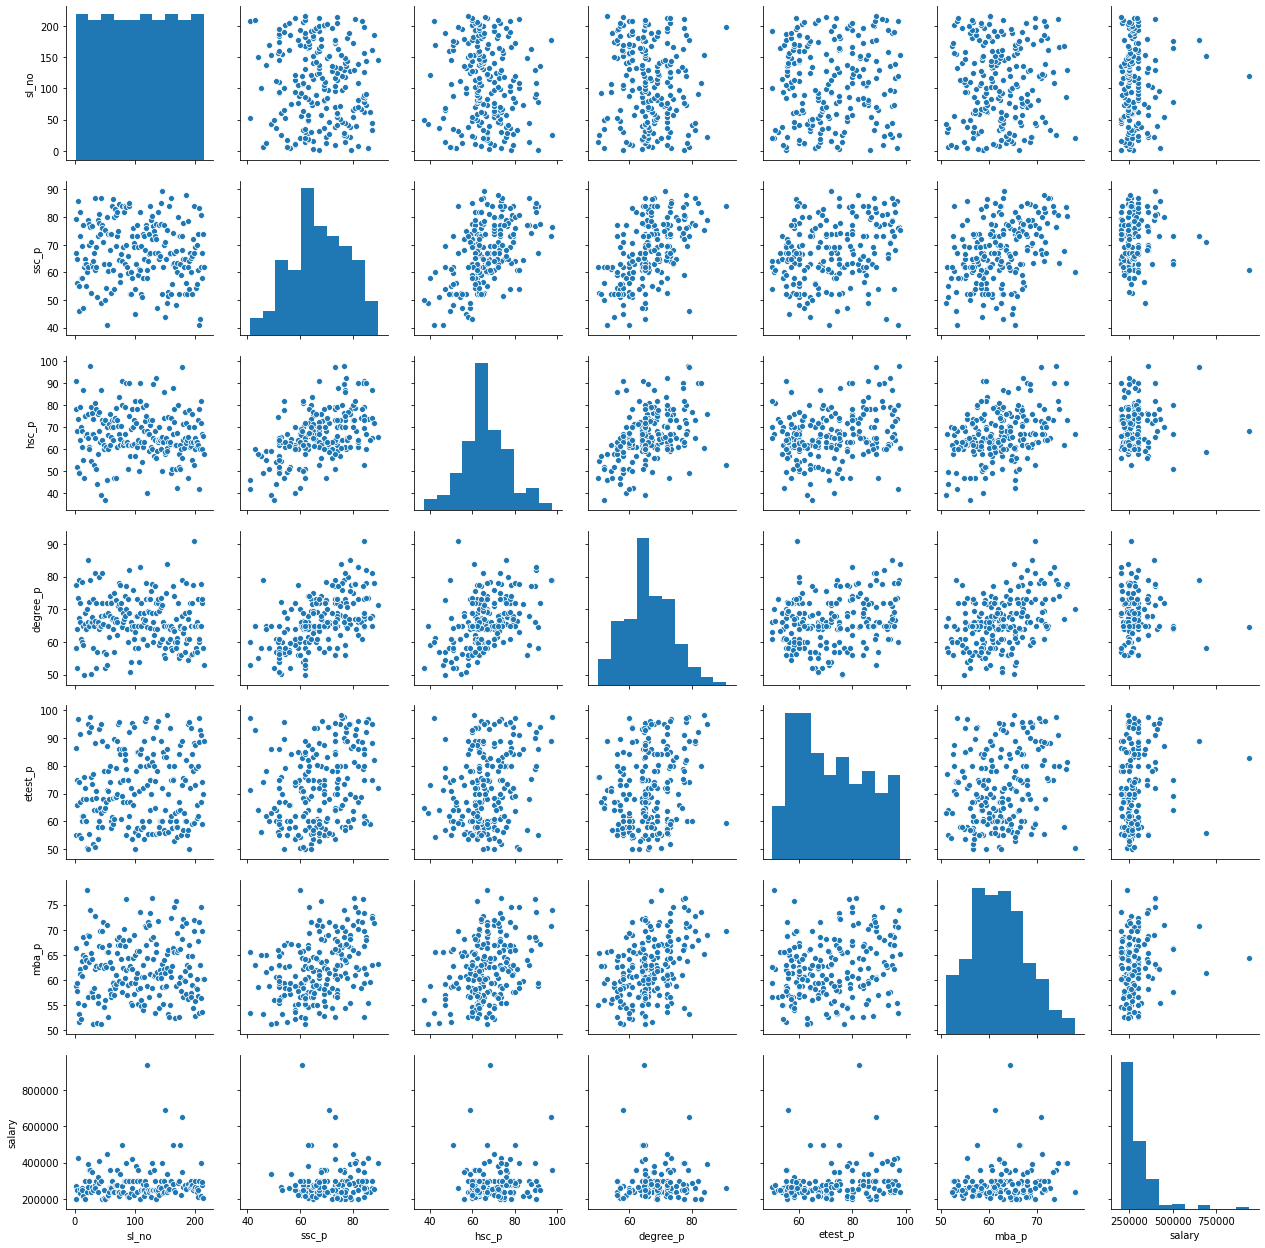

In [34]:
sb.pairplot(dataset)

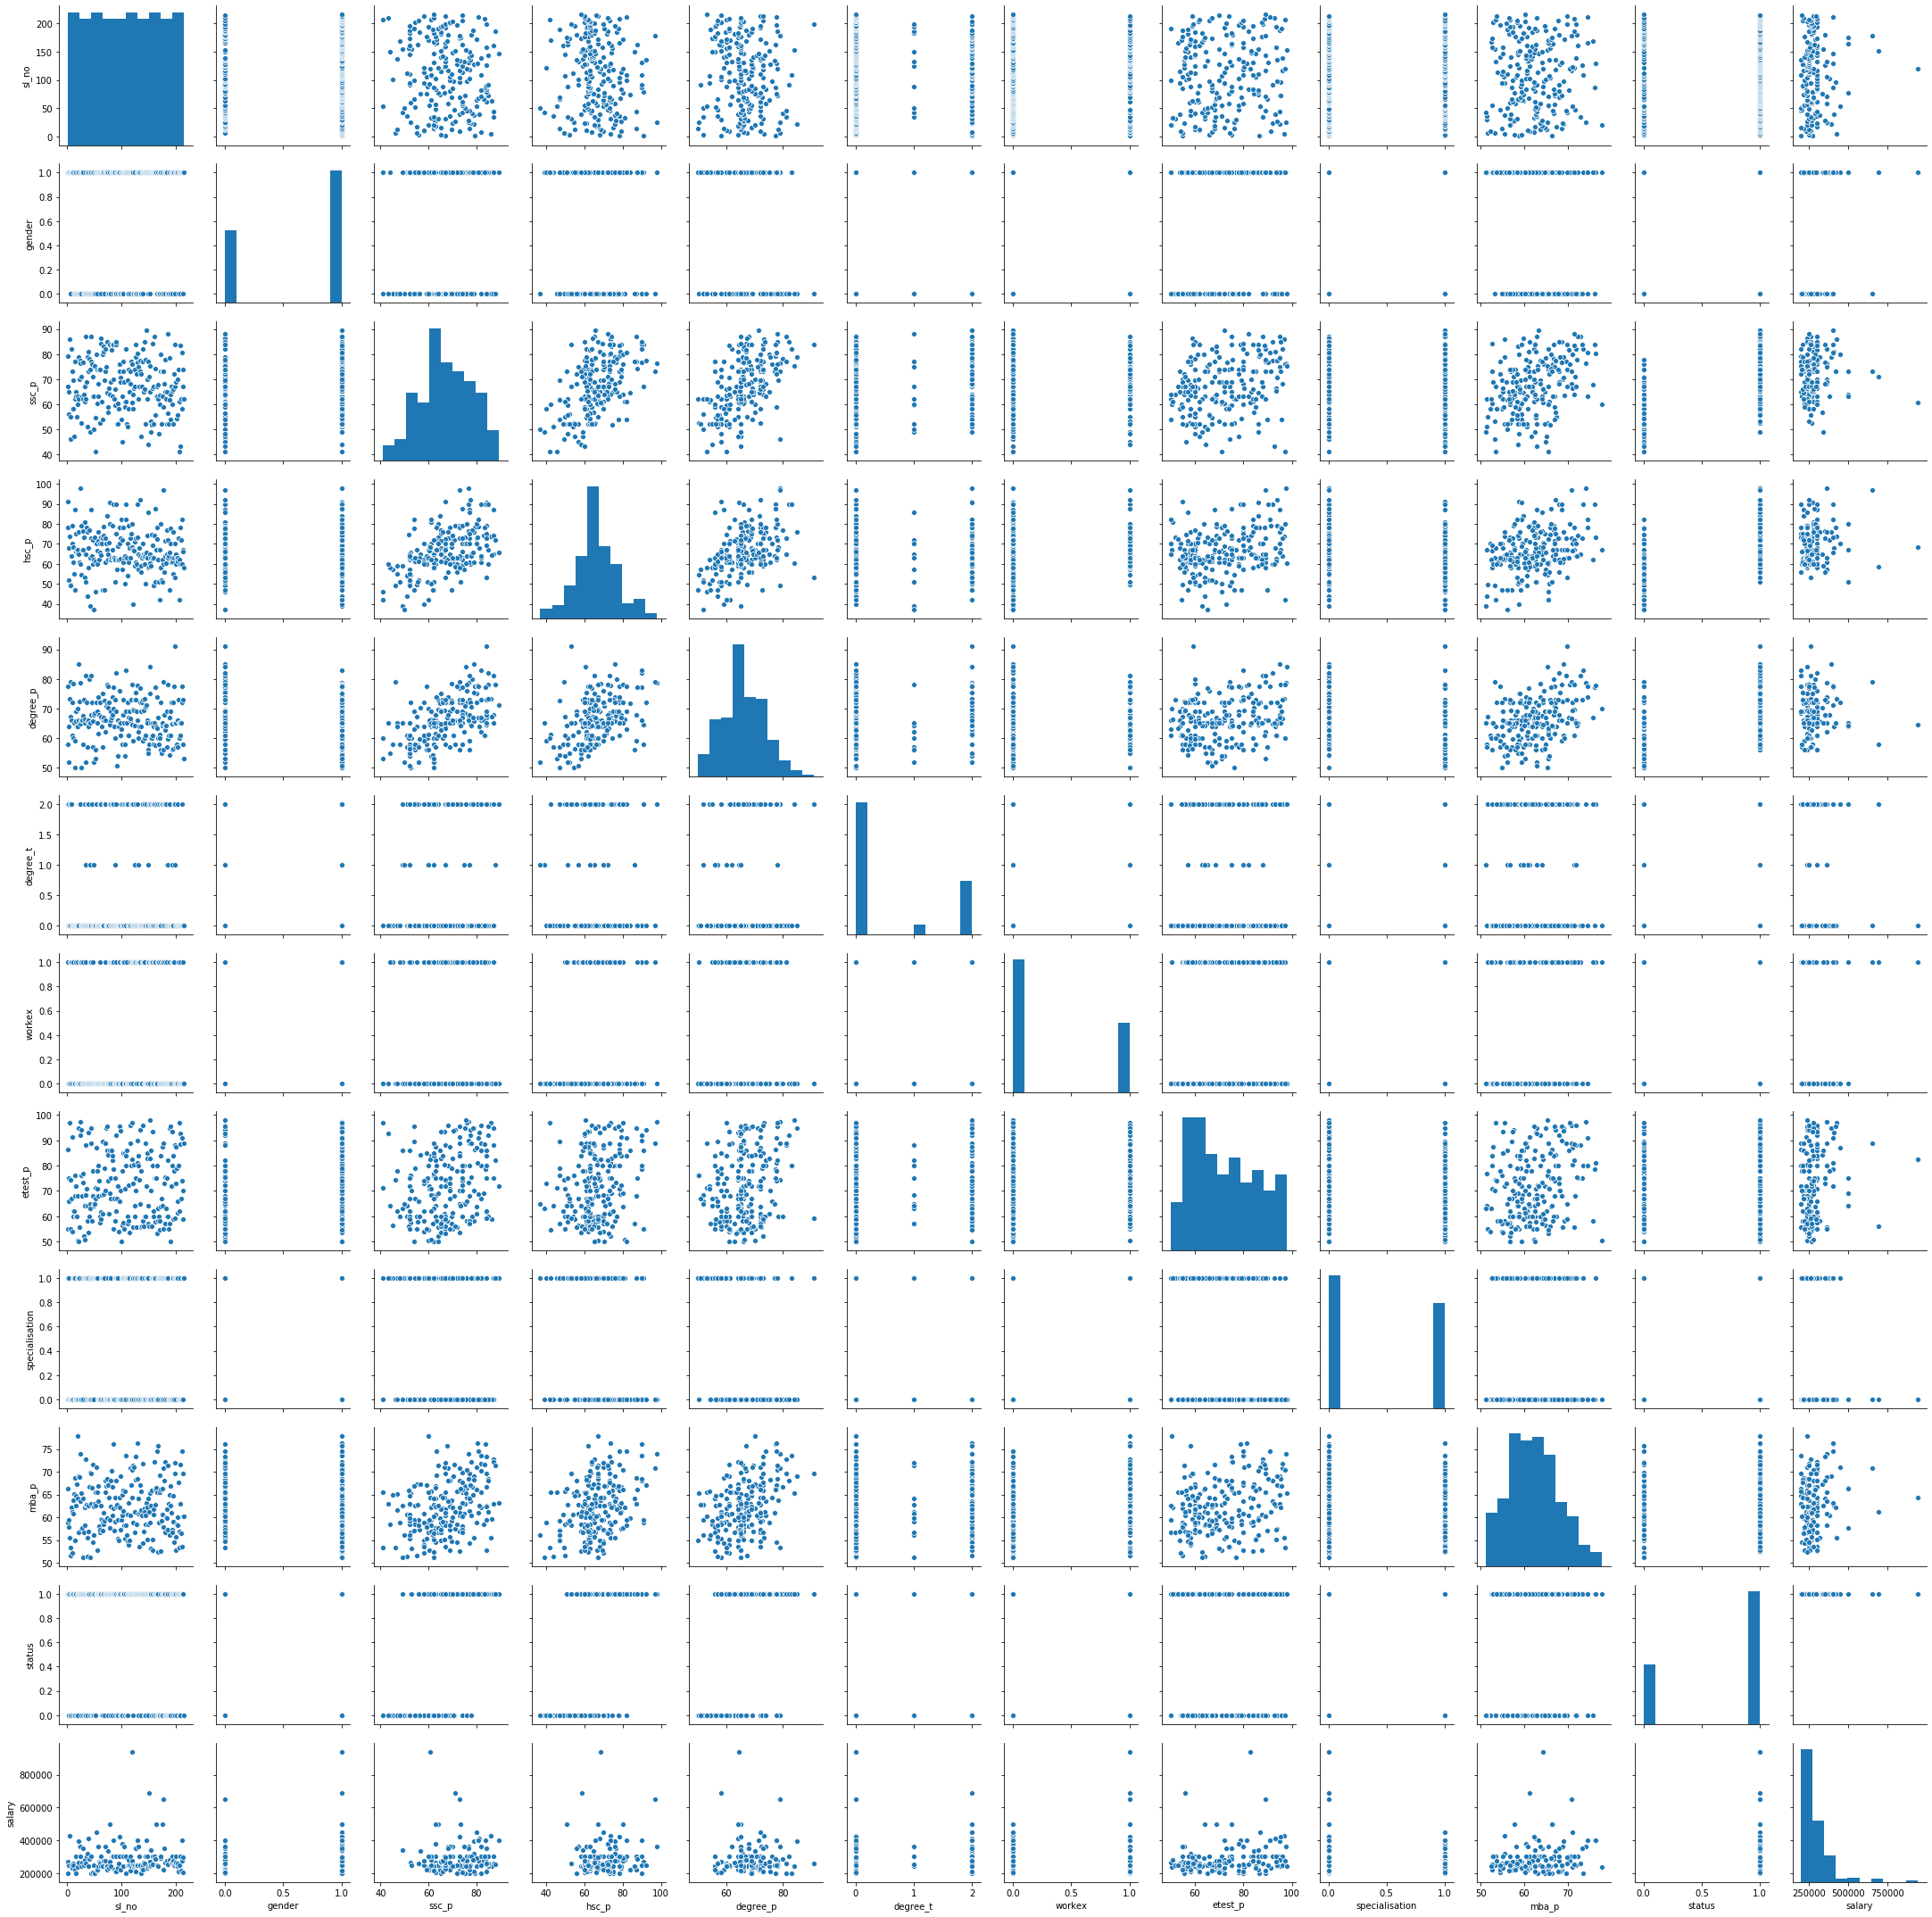

In [35]:
sb.pairplot(dataset_copy)

In [16]:
# female_jobs=np.where(dataset_copy["gender"]==0).value_counts()
# print(female_jobs)

AttributeError: 'tuple' object has no attribute 'value_counts'

In [17]:
dataset_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,0,0,96.8,0,55.50,1,425000.0


In [18]:
predictors=['gender','ssc_p','hsc_p','degree_p','degree_t','workex','etest_p','specialisation','mba_p']

In [19]:
X=dataset_copy[predictors]
Y=dataset_copy['status']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
LogR=LogisticRegression()
LogR.fit(X_train,y_train)
print('Accuracy of Logistic Regression Classifier on training data : {}'.format(LogR.score(X_train,y_train)))
print("Accuracy of Logistic Regression Classifier on testing data : {}".format(LogR.score(X_test,y_test)))
# print(LogR.score(X_train,y_train))
# print(LogR.score(X_test,y_test))


Accuracy of Logistic Regression Classifier on training data : 0.8819875776397516
Accuracy of Logistic Regression Classifier on testing data : 0.8148148148148148
0.8819875776397516
0.8148148148148148


C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
y_pred = LogR.predict( X_test)
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

     Actual  Predicted
198       0          0
37        1          1
89        1          1
168       0          0
171       1          1
75        0          1
96        1          1
137       1          1
5         0          1
83        1          1
55        1          1
145       1          1
160       1          1
112       1          1
74        1          1
203       1          0
126       1          1
12        0          0
153       1          1
158       0          1
169       0          0
141       0          1
209       1          1
190       0          1
144       0          0
18        0          1
185       1          1
15        1          1
86        1          1
71        1          1
7         1          1
63        0          1
143       1          1
97        0          1
136       0          0
162       1          1
33        1          1
154       1          1
90        1          1
211       1          1
106       0          0
181       0          0
139       1

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Accuracy of Decision Tree Classifier on training data : {}'.format(dtc.score(X_train,y_train)))
print("Accuracy of Decision Tree Classifier on testing data : {}".format(dtc.score(X_test,y_test)))

Accuracy of Decision Tree Classifier on training data : 1.0
Accuracy of Decision Tree Classifier on testing data : 0.7222222222222222


In [27]:
y_pred = dtc.predict( X_test)
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

     Actual  Predicted
198       0          0
37        1          1
89        1          1
168       0          0
171       1          1
75        0          0
96        1          1
137       1          1
5         0          0
83        1          1
55        1          1
145       1          1
160       1          0
112       1          1
74        1          0
203       1          0
126       1          1
12        0          0
153       1          0
158       0          1
169       0          0
141       0          1
209       1          1
190       0          1
144       0          0
18        0          1
185       1          1
15        1          1
86        1          1
71        1          1
7         1          1
63        0          1
143       1          1
97        0          0
136       0          0
162       1          1
33        1          1
154       1          0
90        1          1
211       1          0
106       0          0
181       0          1
139       1

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier()
KNN.fit(X_train,y_train)
print('Accuracy of KNN Classifier on training data : {}'.format(KNN.score(X_train,y_train)))
print("Accuracy of KNN Classifier on testing data : {}".format(KNN.score(X_test,y_test)))

Accuracy of KNN Classifier on training data : 0.8633540372670807
Accuracy of KNN Classifier on testing data : 0.7407407407407407


In [29]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
print('Accuracy of GNB Classifier on training data : {}'.format(GNB.score(X_train,y_train)))
print("Accuracy of GNB Classifier on testing data : {}".format(GNB.score(X_test,y_test)))

Accuracy of KNN Classifier on training data : 0.8633540372670807
Accuracy of KNN Classifier on testing data : 0.7777777777777778


In [30]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(X_train,y_train)
print('Accuracy of SVM Classifier on training data : {}'.format(SVM.score(X_train,y_train)))
print("Accuracy of SVM Classifier on testing data : {}".format(SVM.score(X_test,y_test)))

Accuracy of SVM Classifier on training data : 0.8509316770186336
Accuracy of SVM Classifier on testing data : 0.7962962962962963


C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = LogR.predict( X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  9]
 [ 1 36]]
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.80      0.97      0.88        37

    accuracy                           0.81        54
   macro avg       0.84      0.72      0.75        54
weighted avg       0.83      0.81      0.80        54

